<a href="https://colab.research.google.com/github/kdunnell2021/Data-Science/blob/main/Dunnell_Final_Stats_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb #this is downloading software to start files running

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #tjis is defining the differnet enginges to pull from

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
url=  "https://docs.google.com/presentation/d/1IzU0RO1xd46ePDDcjED8FVGLhhFH2RVnXqOwPydYdG4/edit#slide=id.g19b8867b70f_0_149" #url to bring in pictures 

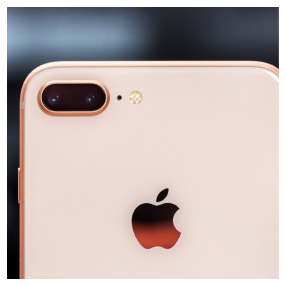

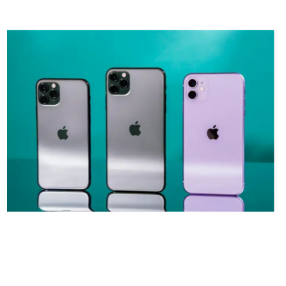

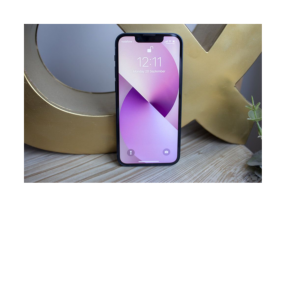

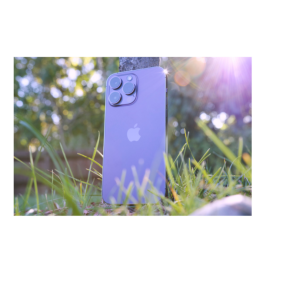

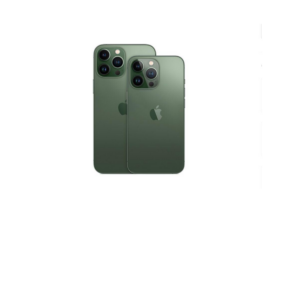

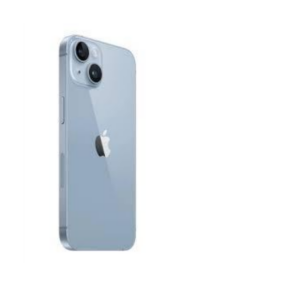

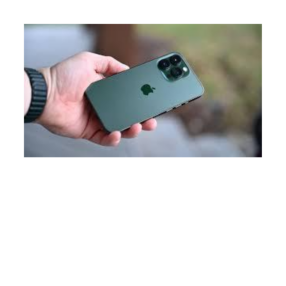

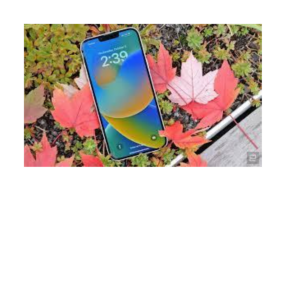

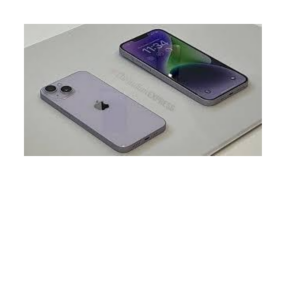

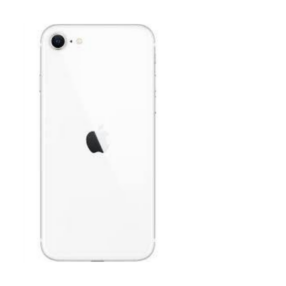

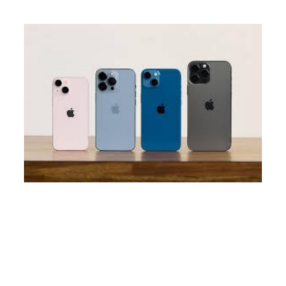

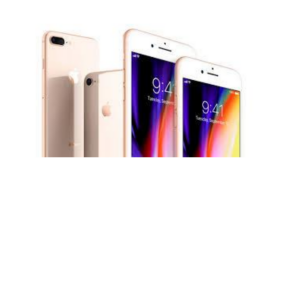

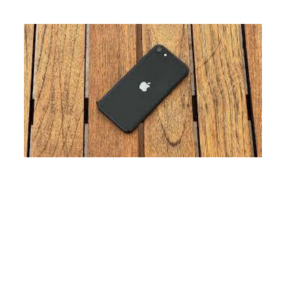

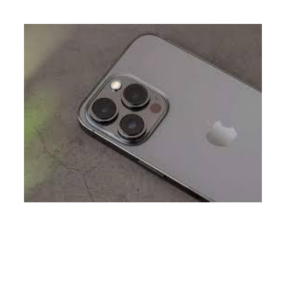

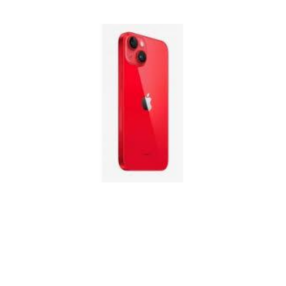

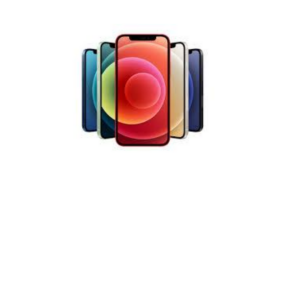

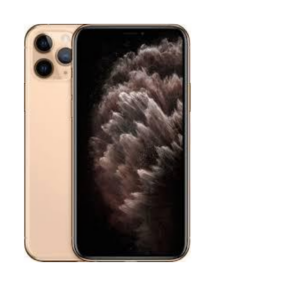

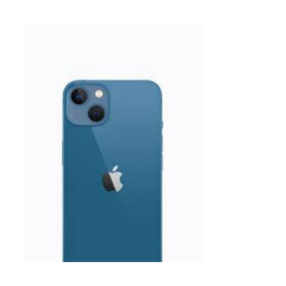

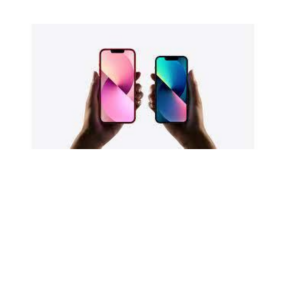

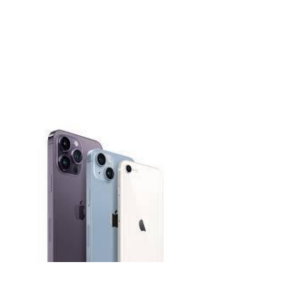

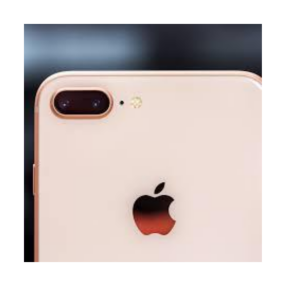

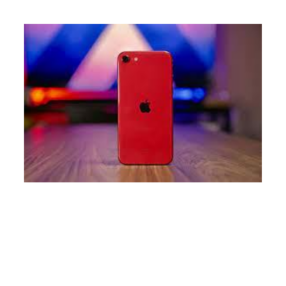

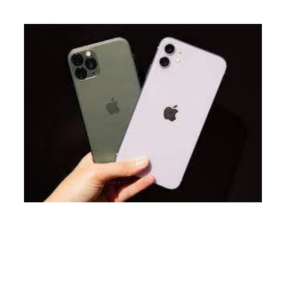

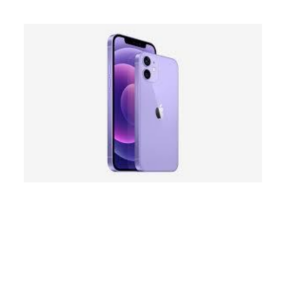

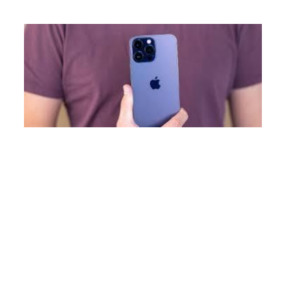

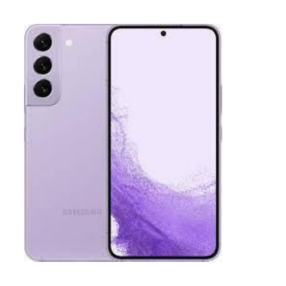

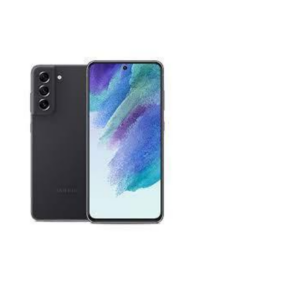

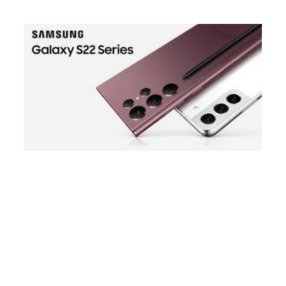

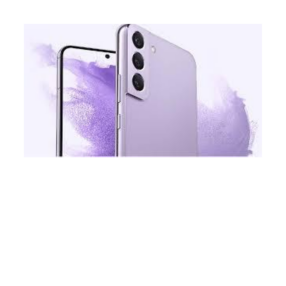

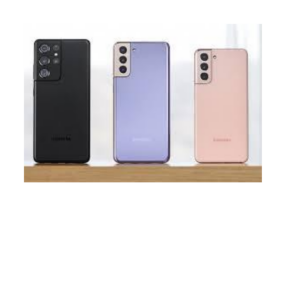

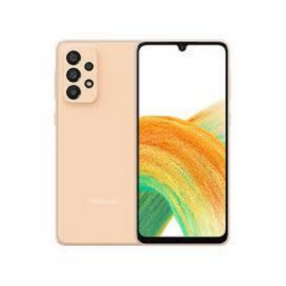

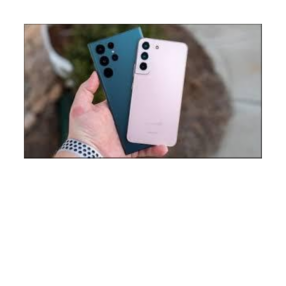

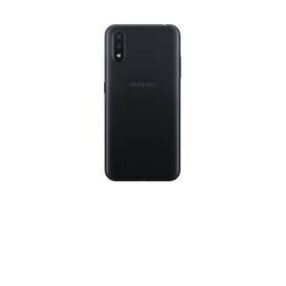

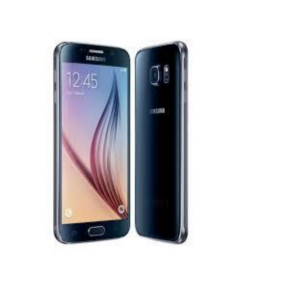

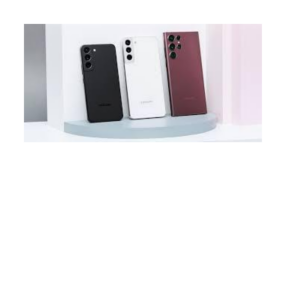

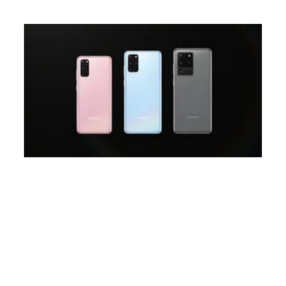

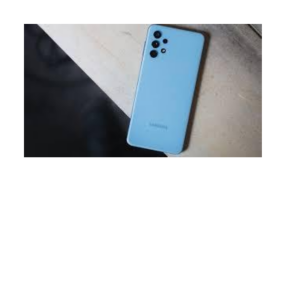

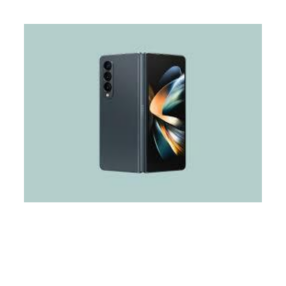

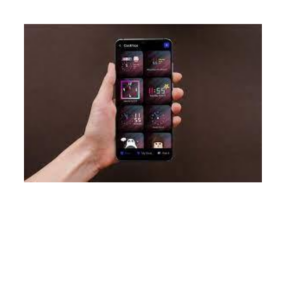

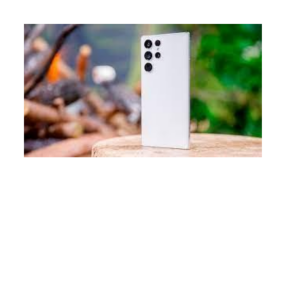

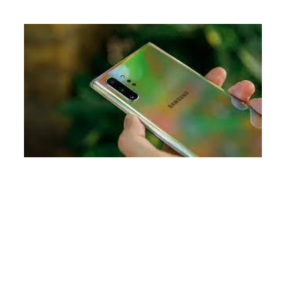

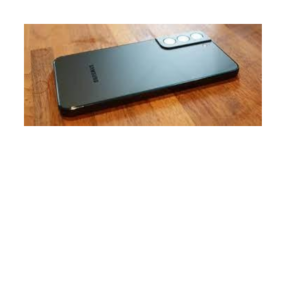

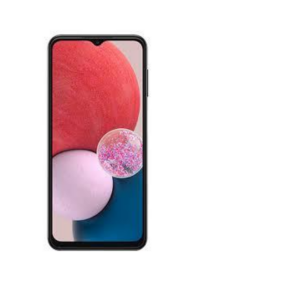

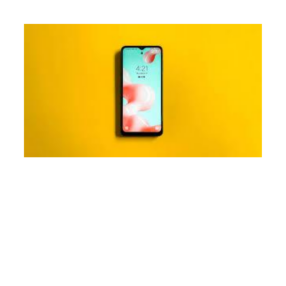

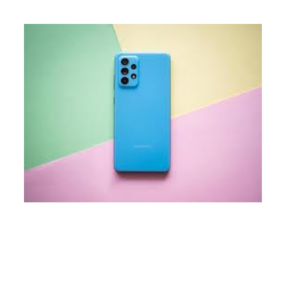

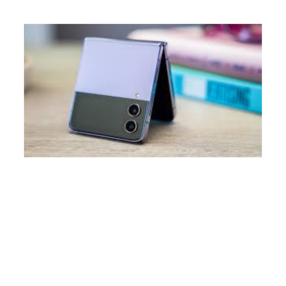

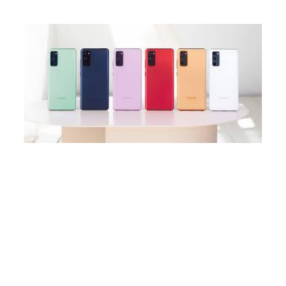

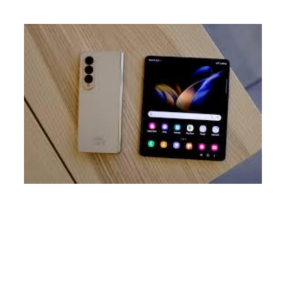

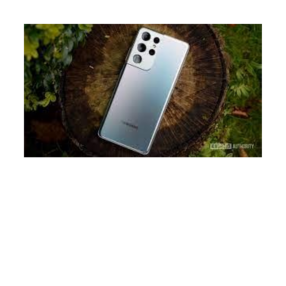

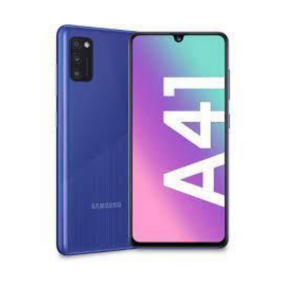

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)  #uploading pictures

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-2.1901, -0.6959, -1.8515,  ..., -3.0014, -2.6900,  8.2543],
        [-5.9021, -4.0941, -3.3012,  ..., -4.0942, -2.6720,  6.1055],
        [-2.8435, -3.3255, -2.4866,  ..., -4.1449, -1.9760,  7.0965],
        ...,
        [-3.4029, -3.5512, -2.4497,  ..., -3.2469, -1.3123,  2.5801],
        [-1.3388, -3.3586, -3.2198,  ..., -0.9117,  1.6453,  1.5210],
        [-2.6372, -1.0689, -1.1074,  ..., -3.9345, -1.3214,  3.5339]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
X[0]

array([-4.83633232e+00, -1.70677459e+00, -6.55159092e+00, -7.10635138e+00,
       -4.43977594e+00,  1.66042602e+00, -5.05594301e+00, -2.98939443e+00,
       -1.42416775e+00, -7.62957811e+00, -7.59557295e+00, -6.08880281e+00,
       -6.55121136e+00, -4.74903440e+00, -5.73805094e+00, -7.11394787e+00,
       -2.56965351e+00, -6.34198475e+00, -5.37477875e+00, -5.75084734e+00,
       -6.63863182e+00, -5.72297049e+00, -4.61849594e+00, -4.76829338e+00,
       -2.89167643e+00, -3.71457362e+00, -7.42982769e+00, -1.67974901e+00,
       -4.43151474e+00, -3.93319225e+00, -3.05484629e+00, -3.46293831e+00,
       -3.66032505e+00, -5.18577099e+00, -2.54278994e+00, -5.77422619e+00,
        3.40353437e-02, -2.19287539e+00, -3.86694074e+00, -3.66045332e+00,
       -4.46033573e+00, -6.35605097e+00, -1.51816475e+00, -4.50654364e+00,
       -6.40877867e+00, -3.53934717e+00, -3.50566149e+00, -5.64465618e+00,
       -3.93837976e+00, -7.04627132e+00, -4.18983316e+00, -1.59431243e+00,
       -3.02305484e+00, -

In [ ]:
np.argmax(X[0])

207

In [ ]:
labels[207]

'golden retriever'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10] #top ten guesses

In [ ]:
for i in list(guesses): #list of all guesses
    print(labels[i])

toilet tissue, toilet paper, bathroom tissue
switch, electric switch, electrical switch
pencil sharpener
binder, ring-binder
switch, electric switch, electrical switch
switch, electric switch, electrical switch
joystick
pencil box, pencil case
printer
switch, electric switch, electrical switch
switch, electric switch, electrical switch
lighter, light, igniter, ignitor
rule, ruler
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
lighter, light, igniter, ignitor
pencil sharpener
remote control, remote
switch, electric switch, electrical switch
lighter, light, igniter, ignitor
switch, electric switch, electrical switch
safe
binder, ring-binder
cleaver, meat cleaver, chopper
lighter, light, igniter, ignitor
switch, electric switch, electrical switch
switch, electric switch, electrical switch
desktop computer
rule, ruler
paper towel
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
lighter, light, igniter, ignitor
horizontal bar, high bar
cellular 

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

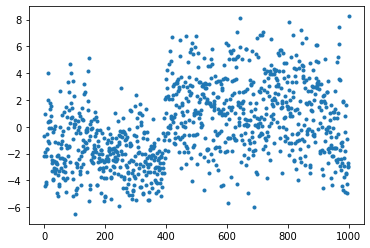

In [ ]:
plt.plot(X[0],'.') #images plotted 

(array([ 19.,  77., 170., 196., 170., 145., 121.,  57.,  34.,  11.]),
 array([-6.5038204 , -5.028008  , -3.5521953 , -2.0763829 , -0.6005703 ,
         0.87524223,  2.3510547 ,  3.8268673 ,  5.30268   ,  6.7784925 ,
         8.254305  ], dtype=float32),
 <a list of 10 Patch objects>)

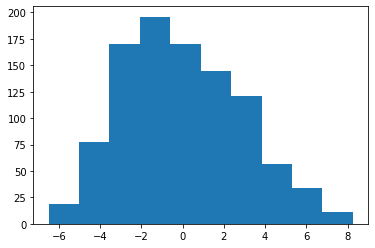

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▄▆▁▄█▇▄▄▇▇▄▄█▆▃▄▇▅▇▇▅▂▆▅▆█▃▅█▃█▁▂▃▆▄█▁▄█
loss,▅▃█▅▁▂▅▅▂▂▅▅▁▃▆▅▂▄▂▂▄▇▃▄▃▁▆▄▁▆▁█▇▆▃▅▁█▅▁
acc_train,0.28125
loss,1.03201


<ipython-input-85-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/